<a href="https://colab.research.google.com/github/whyjayjay/deeplearning4beginner/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 4.1.5 Fashion-MNIST 살펴보기
from tensorflow.keras.datasets.fashion_mnist import load_data 

# Fasion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data() 
print(x_test.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(10000, 28, 28) (10000, 28, 28)


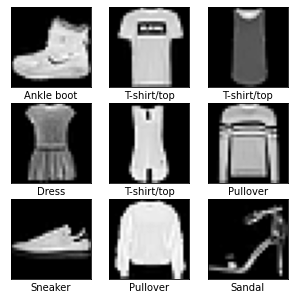

In [2]:
# 데이터 그려보기 
import matplotlib.pyplot as plt 
import numpy as np 
np.random.seed(777) 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

sample_size = 9 
random_idx  = np.random.randint(60000, size=sample_size) 

plt.figure(figsize=(5,5)) 
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1 )
    plt.xticks([])
    plt.yticks([]) 
    plt.imshow(x_train[i], cmap='gray') 
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [3]:
# 전처리 및 검증 데이터셋 만들기 
# 0~1 범위로 만듭니다. 
x_train = x_train / 255
x_test  = x_test / 255 

from tensorflow.keras.utils import to_categorical 
# 각 데이터의 레이블을 범주형 형태로 변경합니다. 
y_train = to_categorical(y_train) 
y_test  = to_categorical(y_test)

# 검증 데이터셋을 만듭니다. 
from sklearn.model_selection import train_test_split 

# 학습/테스트 데이터를 0.7/0.3의 비율로 분리합니다. 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size    = 0.3,
                                                  random_state = 777)

In [4]:
# 첫 번째 모델 구성하기 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

first_model = Sequential() 
# 입력 데이터의 형태를 꼭 명시해야 합니다. 
first_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> (28 * 28) 
first_model.add(Dense(64, activation='relu'))       # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation='relu'))       # 32개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation='softmax'))    # 10개의 출력을 가지는 신경망


In [5]:
# 학습 과정 설정 및 학습하기 
first_model.compile(optimizer='adam',   #옵티마이저: Adam
                    # 손실함수: categorical_crossentropy
                    loss = 'categorical_crossentropy',
                    # 모니터링 할 평가지표: acc
                    metrics=['acc'])

first_history = first_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.9514 - acc: 0.6827 - val_loss: 0.4766 - val_acc: 0.8329
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4594 - acc: 0.8370 - val_loss: 0.4362 - val_acc: 0.8454
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4160 - acc: 0.8506 - val_loss: 0.4245 - val_acc: 0.8423
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3887 - acc: 0.8596 - val_loss: 0.3900 - val_acc: 0.8648
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3677 - acc: 0.8670 - val_loss: 0.3655 - val_acc: 0.8703
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3504 - acc: 0.8754 - val_loss: 0.3879 - val_acc: 0.8597
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3398 - acc: 0.8768 - val_loss: 0.3645 - val_acc: 0.8697
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [6]:
# 두 번째 모델 구성하기 
second_model = Sequential() 
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape = (28,28)))   # (28, 28) -> (28 * 28) 
# 128개의 출력을 가지는 Dense층을 추가합니다. 
second_model.add(Dense(128, activation = 'relu')) 
# 64개의 출력을 가지는 Dense층을 추가합니다. 
second_model.add(Dense(128, activation = 'relu')) 
# 32개의 출력을 가지는 Dense층을 추가합니다.
second_model.add(Dense(32, activation = 'relu')) 
# 10개의 출력을 가지는 신경망을 추가합니다. 
second_model.add(Dense(10, activation = 'softmax')) 

second_model.compile(optimizer='adam', # 옵티마이저: Adam
                     # 손실 함수: categorical_crossentropy
                     loss = 'categorical_crossentropy',
                     # 모니터링 할 평가지표: acc 
                     metrics=['acc'])

second_history = second_model.fit(x_train, y_train,
                                  epochs = 30,
                                  batch_size = 128,
                                  validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.8482 - acc: 0.7240 - val_loss: 0.4175 - val_acc: 0.8553
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4182 - acc: 0.8529 - val_loss: 0.3932 - val_acc: 0.8595
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3729 - acc: 0.8634 - val_loss: 0.3791 - val_acc: 0.8633
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3343 - acc: 0.8787 - val_loss: 0.3498 - val_acc: 0.8711
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3207 - acc: 0.8798 - val_loss: 0.3370 - val_acc: 0.8793
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3005 - acc: 0.8880 - val_loss: 0.3517 - val_acc: 0.8702
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2854 - acc: 0.8935 - val_loss: 0.3506 - val_acc: 0.8788
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

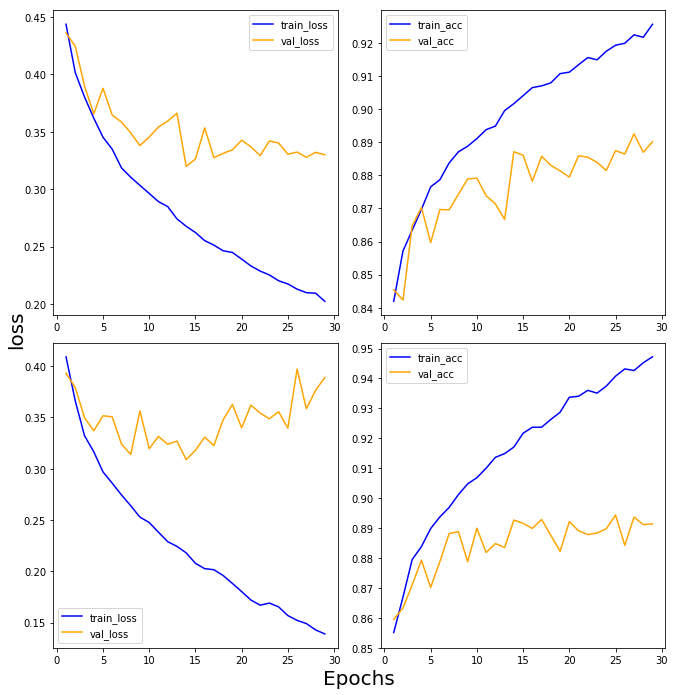

In [10]:
# 두 모델의 학습 과정 그려보기
import numpy as np
import matplotlib.pyplot as plt 

def draw_loss_acc(history_1, history_2, epochs): 
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys()) 

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,10))
    ax  = fig.add_subplot(1,1,1)

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False,
                   bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i+1)
        temp = keys[i%2]
        val_temp = keys[(i+2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                     color = 'orange',label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01)) 
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)